# UCI Default of Credit Card Clients
Author: Jessica Wells
Source Data: University of California Irvine Dataset
Yeh, I. (2009). Default of Credit Card Clients [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

In [6]:
import pandas as pd
import numpy as np
#couldn't fetch dataset w/ UCIMLRepo. Prob dataset ID no longer 350 or something
df = pd.read_excel("/Users/jessicawells/Downloads/default of credit card clients.xls", sheet_name='Data', header=1, engine='xlrd')

In [15]:
len(df)

30000

UCI claims no missing values, probably don't need to worry about dropping, imputing, mean replacement.

In [7]:
pd.set_option('display.max_columns', None) #this will show all my columns
df.head(100)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,90000,1,2,2,35,0,0,0,0,0,0,83725,85996,87653,35565,30942,30835,3621,3597,1179,1112,1104,1143,0
96,97,360000,1,1,1,43,-1,-1,-1,-1,-1,0,3967,8322,3394,6451,26370,9956,8339,3394,12902,27000,0,68978,0
97,98,150000,1,1,2,27,0,0,0,0,0,0,86009,86108,89006,89775,87725,40788,4031,10006,3266,4040,1698,800,0
98,99,50000,2,3,1,22,0,0,0,0,0,0,18722,18160,16997,13150,8866,7899,1411,1194,379,281,321,197,0


#### Column Descriptions According to UCI:
- LIMIT_BAL = Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

- PAY_X = Past payment history tracked from April to September 2005. So PAY_0 is repayment status in September, PAY_6 is repayment status in April.

- BILL_AMT_X = Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September...BILL_AMT6 = amount of bill statement in April.

- PAY_AMT_X = Amount of previous payment (NT dollar). PAY_AMT_1 = amount paid in September...PAY_AMT_6= amount paid in April.

#### Value Descriptions on PAY_X According to UCI:
- PAY_X columns
    - -1 = paid in full (not delinquent)
    - 1 to 9 = payment delay for one month, etc. to 9 months delay or beyond
    - I also see entries 0 and -2 which are not discussed on UCI website. Thankful for Kaggle user EZBORAL who contacted the original professors and found the meaning to these:
            -2 = no consumption (credit card wasn't used at all -- not delinquent)
            -0 = use of revolving credit (balance was carried over but minimal payment for bank was paid on time -- not del.)

In [20]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Some predicators are clearly categorical despite dtype int64; for simplicity I'm going to leave them as is.

In [9]:
#df.isnull().sum() #none
df.isna().any().any()

np.False_

#### Initial Observations on Values and Plan of Action

Before modeling, some things to always consider: **scaling**, **class imbalance**, and whether a **linear model is a reasonable baseline**.

#### Scaling
Some models are sensitive to feature scale (Logistic Regression, SVM, neural nets, etc.) Tree-based models (RF, gradient boosting) are generally not scale-sensitive.

I will start with **Standard Scaler** (gives all features mean=0 and stddev = 1) and revisit other scaling (MinMax, Robust, etc.) if needed.

#### Check Class Imbalance

In [3]:
df['default payment next month'].value_counts(dropna=False)

default payment next month
0    23364
1     6636
Name: count, dtype: int64

Class Imbalance Findings:
- The target is moderately imbalanced (~22% positive). Will start with using `class_weight = "balanced"` (and `scale_pos_weight` for XGBoost) then can address other resampling approaches, like SMOTE later.

- Also, if class imbalance present, accuracy is usually not the best metric because high accuracy can be achieved by predicting the majority class (0) which will naturally be correct 78% of the time.

- I will try: PR-AUC (Average Precision) as the primary metric since it's more informative when the positive class is rare. Will also look at ROC-AUC as a secondary metric.

#### Separate data into features and target

In [10]:
X = df.iloc[:, 0:24]
y = df.iloc[:, 24]
np.unique(y)

array([0, 1])

In [19]:
y.dtype

dtype('int64')

#### Split data into training and testing. Will start w/ 80/20 split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48, stratify=y)

Originally had 30K observations (23,264 class 0, 6636 class 1). Let's make sure split worked

In [18]:
#np.bincount(y_train) #18691, 5309
np.bincount(y_test) #4673, 1327

array([4673, 1327])

I feel like theres no missing data but better safe than sorry check one more time

In [81]:
missing = X_train.isna().mean().sort_values(ascending=False)
missing

LIMIT_BAL    0.0
BILL_AMT2    0.0
PAY_AMT5     0.0
PAY_AMT4     0.0
PAY_AMT3     0.0
PAY_AMT2     0.0
PAY_AMT1     0.0
BILL_AMT6    0.0
BILL_AMT5    0.0
BILL_AMT4    0.0
BILL_AMT3    0.0
BILL_AMT1    0.0
SEX          0.0
PAY_6        0.0
PAY_5        0.0
PAY_4        0.0
PAY_3        0.0
PAY_2        0.0
PAY_0        0.0
AGE          0.0
MARRIAGE     0.0
EDUCATION    0.0
PAY_AMT6     0.0
dtype: float64

Yeah that ID column is not going to help me as a feature.

In [22]:
id_train = X_train['ID'].copy()
id_test = X_test['ID'].copy()
X_train = X_train.drop(columns = ['ID'])
X_test = X_test.drop(columns = ['ID'])

#### Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler, RobustScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Baseline models (LR, RF). The results in the following sections are *exploratory* and based on a single train/test split.

#### Final model comparisons and hyperparameter selection are done later using cross-validation on the training set.

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

#solvers for logistic regression: lbfgs, sag, liblinear, etc. -- binary classif will use liblinear here

lr = LogisticRegression(C=1, solver='liblinear', max_iter=1000, class_weight='balanced', random_state=48) #f1 0.4782, prauc 0.5005, rocauc 0.7247


lr.fit(X_train_std, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",48
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`m

In [34]:
from sklearn.metrics import (precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, confusion_matrix)

y_pred_log = lr.predict(X_test_std) # predictions, default thresh is 0.5
y_proba_log = lr.predict_proba(X_test_std)[:, 1] #probabilites for the positive class

# print(precision_score(y_true = y_test, y_pred = y_pred_log))
# print(recall_score(y_true = y_test, y_pred = y_pred_log))
print(f1_score(y_true = y_test, y_pred = y_pred_log))


0.47817625799277175


In [32]:
print(average_precision_score(y_test, y_proba_log)) #pr-auc
print(roc_auc_score(y_test, y_proba_log))

0.5004953335184557
0.7246624010594298


In [33]:
print(confusion_matrix(y_test, y_pred_log))

[[3263 1410]
 [ 467  860]]


#### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=48, class_weight = 'balanced_subsample') #bootstrapping
#performacne: f1 0.4649, prauc 0.5487, rocauc 0.7785
forest.fit(X_train, y_train) # rf doesn't need standardization

y_pred_rf = forest.predict(X_test)
y_proba_rf = forest.predict_proba(X_test)[:, 1]
print(f1_score(y_true = y_test, y_pred = y_pred_rf))
print(average_precision_score(y_test, y_proba_rf)) #pr-auc
print(roc_auc_score(y_test, y_proba_rf))


0.4649337910740559
0.5486645011787985
0.7784968112766326


Random Forest did better than Logistic Regression, suggesting the relationship between the features and risk of defaulting may involve non-linear effects and/or feature interaction.

#### Next up: Outliers/heavy tails might affect linear models more than tree models. Review distributions across features.
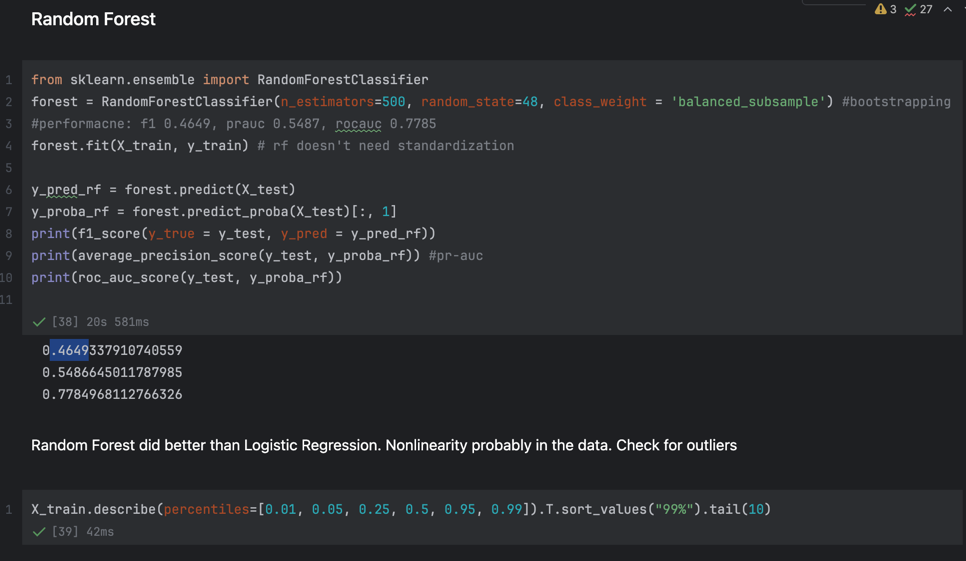

In [39]:
X_train.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.95, 0.99]).T.sort_values("99%").tail(10)

,count,mean,std,min,1%,5%,25%,50%,95%,99%,max
PAY_AMT3,24000.0,5277.107792,18090.534426,0.0,0.00,0.0,390.00,1800.0,17993.35,71277.79,896040.0
PAY_AMT2,24000.0,5886.558000,23528.156976,0.0,0.00,0.0,835.75,2009.0,19141.10,74201.61,1684259.0
PAY_AMT6,24000.0,5144.378917,17536.644626,0.0,0.00,0.0,113.75,1500.0,17013.60,77325.87,527143.0
BILL_AMT6,24000.0,38573.210542,59282.901223,-339603.0,-350.04,0.0,1240.00,16845.0,161831.00,274825.11,961664.0
BILL_AMT5,24000.0,40043.009417,60505.529714,-81334.0,-261.00,0.0,1740.00,18038.5,165078.65,284838.15,927171.0
BILL_AMT4,24000.0,43130.990875,64207.622697,-170000.0,-218.02,0.0,2311.50,19011.5,173459.60,304903.94,891586.0
BILL_AMT3,24000.0,46853.430708,69328.985873,-157264.0,-200.00,0.0,2687.75,20031.5,187521.00,325773.17,1664089.0
BILL_AMT2,24000.0,48954.483083,70844.165391,-69777.0,-200.00,0.0,2946.00,21033.5,194040.95,337523.70,983931.0
BILL_AMT1,24000.0,51031.342792,73279.547127,-165580.0,-70.03,0.0,3516.50,22209.0,200581.60,349134.85,964511.0
LIMIT_BAL,24000.0,167124.736667,129426.236842,10000.0,10000.00,20000.0,50000.00,140000.0,430000.00,500000.00,1000000.0


Initial thoughts:
> **Rule of thumb:** Large gaps between *min vs 1st percentile* and *99th percentile vs max* suggest extreme tails/outliers.
- BILL_AMT* have heavy right tails and some extreme negatives in the distribution of the feature. Most notably in BILL_AMT6 (negatives) and BILL_AMT2 and 3 (right tail)
- PAY_AMT* show heavy right tails, especially PAY_AMT2 and 3.

Since LR did poorly in comparison to RF going to try RobustScaler just to see if it will lift LR a bit before diving into feature importance, cross validation, etc.

### Robust Scaling due to significant outlier presence

In [40]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

X_train_robust = rs.fit_transform(X_train)
X_test_robust = rs.transform(X_test)


In [43]:

lr = LogisticRegression(C=1, solver='liblinear', max_iter=1000, class_weight='balanced', random_state=48)
lr.fit(X_train_robust, y_train)
y_pred_log = lr.predict(X_test_robust) # predictions, default thresh is 0.5
y_proba_log = lr.predict_proba(X_test_robust)[:, 1] #probabilites for the positive class

print(f1_score(y_true = y_test, y_pred = y_pred_log))
print(average_precision_score(y_test, y_proba_log)) #pr-auc
print(roc_auc_score(y_test, y_proba_log))

0.47817625799277175
0.5004922980216189
0.7246556280358667


#### Robust scaling didn't really change anything, possibly worsened performance slightly means outliers aren't the issue for poorer LR performance. We will go back to Standard Scaler and try various values of C

In [46]:
lr = LogisticRegression(C=100, solver='liblinear', max_iter=1000, class_weight='balanced', random_state=48) #0.1 and 1 similar performance --- 0.01 underperformed and then 100 is similar to 0.1 and 1.
lr.fit(X_train_std, y_train)
y_pred_log = lr.predict(X_test_std) # predictions, default thresh is 0.5
y_proba_log = lr.predict_proba(X_test_std)[:, 1] #probabilites for the positive class

print(f1_score(y_true = y_test, y_pred = y_pred_log))
print(average_precision_score(y_test, y_proba_log)) #pr-auc
print(roc_auc_score(y_test, y_proba_log))

0.4774874930516954
0.5004902782495892
0.7246598208599773


C does not have much effect in this case.

#### Perform Grid Search on LR and RF to optimize hyperparameters and cross validation.

#### Grid Search Logistic Regression

In [57]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 48)

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', random_state=48)),
])

# we already found tuning C didn't help much but we'll see
param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

gs_lr = GridSearchCV(pipe_lr, param_grid = param_grid, scoring = 'average_precision', cv=cv)
gs_lr.fit(X_train, y_train)

print(gs_lr.best_score_)
print(gs_lr.best_params_)

0.5016123426805711
{'lr__C': 1}


#### Grid Search Random Forest

In [59]:
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier(class_weight = 'balanced_subsample', n_jobs=-1, random_state=48))
])

param_grid = {
    'rf__n_estimators': [200, 500, 800, 1000]
}

gs_rf = GridSearchCV(pipe_rf, param_grid = param_grid, scoring = 'average_precision', cv=cv)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
print(gs_rf.best_params_)

0.5392098294223407
{'rf__n_estimators': 1000}


#### Tuning RF more and then will move into ensembling techniques. Probably XGBoost

In [60]:
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators = 1000, class_weight = 'balanced_subsample', n_jobs=-1, random_state=48))
])

param_grid = {
    'rf__min_samples_leaf': [1, 5, 10],
    'rf__max_features': ['sqrt', 0.5, None],
    'rf__max_depth': [None, 10, 20]
}

gs_rf = GridSearchCV(pipe_rf, param_grid = param_grid, scoring = 'average_precision', cv=cv)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
print(gs_rf.best_params_)

0.5561378136673051
{'rf__max_depth': 10, 'rf__max_features': None, 'rf__min_samples_leaf': 10}


#### XGBoost

Haven't used XGBoost since leaving anaconda. Had to install homebrew then brew install libomp to get xgboost to work.

Docs: https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html

In [74]:
import xgboost as xgb

In [61]:
y_train.value_counts()

default payment next month
0    18691
1     5309
Name: count, dtype: int64

In [66]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 48)

#default booster is gbtree
pipe_gbm = Pipeline([
    ('gbm', xgb.XGBClassifier(scale_pos_weight = 18691/5309, random_state=48, objective = 'binary:logistic', eval_metric = 'logloss', n_jobs= -1)), #xgboost uses scale pos weight neg/pos
])

param_grid = {
    'gbm__n_estimators': [200, 500, 800, 1000],
    'gbm__learning_rate': [0.005, 0.01, 0.05, 0.1]
}

gs_gbm = GridSearchCV(pipe_gbm, param_grid = param_grid, scoring = 'average_precision', cv=cv)
gs_gbm.fit(X_train, y_train)

print(gs_gbm.best_score_)
print(gs_gbm.best_params_)

0.5561195971849393
{'gbm__learning_rate': 0.01, 'gbm__n_estimators': 500}


RF and XGBoost have very similar results. Results say best estimators/number of boosting rounds is 500. What's the default then? -- don't see it in docs Scikitlearn's gradient boosting I believe is 100

In [78]:
test = xgb.XGBClassifier()
test.fit(X_train, y_train)
print(test.get_booster().num_boosted_rounds())

100


also 100

#### Run top models on test set. We already know LR was not as good, but recording for good measure

In [67]:
top_lr = gs_lr.best_estimator_
top_lr.fit(X_train, y_train)
proba_lr = top_lr.predict_proba(X_test)[:, 1]
test_prauc_lr = average_precision_score(y_test, proba_lr)

top_rf = gs_rf.best_estimator_
top_rf.fit(X_train, y_train)
proba_rf = top_rf.predict_proba(X_test)[:, 1]
test_prauc_rf = average_precision_score(y_test, proba_rf)

top_gbm = gs_gbm.best_estimator_
top_gbm.fit(X_train, y_train)
proba_gbm = top_gbm.predict_proba(X_test)[:, 1]
test_prauc_gbm = average_precision_score(y_test, proba_gbm)

#### Results

Final metrics reported below are from the held-out test set; CV was used for hyperparameter selection.

In [68]:
import pandas as pd

results_table = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "CV PR-AUC": gs_lr.best_score_,
        "Best Params": gs_lr.best_params_,
        "Test PR-AUC": test_prauc_lr
    },
    {
        "Model": "Random Forest",
        "CV PR-AUC": gs_rf.best_score_,
        "Best Params": gs_rf.best_params_,
        "Test PR-AUC": test_prauc_rf
    },
    {
        "Model": "XGBoost",
        "CV PR-AUC": gs_gbm.best_score_,
        "Best Params": gs_gbm.best_params_,
        "Test PR-AUC": test_prauc_gbm
    }
]).sort_values("Test PR-AUC", ascending=False)

In [69]:
results_table.style.format({"CV PR-AUC": "{:.4f}", "Test PR-AUC": "{:.4f}"})

,Model,CV PR-AUC,Best Params,Test PR-AUC
2,XGBoost,0.5561,"{'gbm__learning_rate': 0.01, 'gbm__n_estimators': 500}",0.5712
1,Random Forest,0.5561,"{'rf__max_depth': 10, 'rf__max_features': None, 'rf__min_samples_leaf': 10}",0.5664
0,Logistic Regression,0.5016,{'lr__C': 1},0.5005


#### XGBoost PR Curve

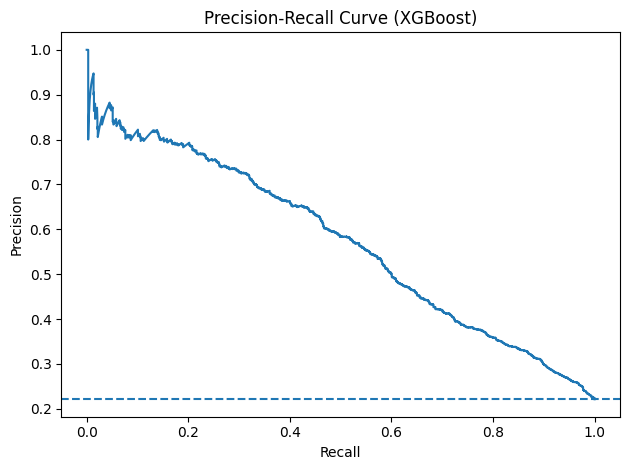

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

prec, rec, _ = precision_recall_curve(y_test, proba_gbm)
plt.figure()
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall Curve (XGBoost)")

baseline = y_test.mean()
plt.axhline(baseline, linestyle="--")
plt.tight_layout()
plt.show()

#### ROC Curve XGBoost

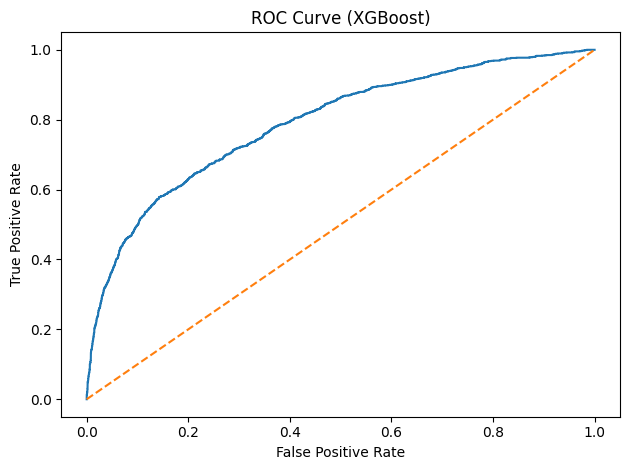

In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, proba_gbm)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve (XGBoost)")
plt.tight_layout()
plt.show()

#### Previously with other datasets I've explored in my masters, I used Random Forest to find the most significant features. After some research, it seems permutation importance might be a better fit. Impurity-based (gini/entropy) method can favor (i.e. inflate the importance of) features with many distinct values since the tree will get more opportunities to find a split that seems to perform well, by chance -- that doesn't necessarily mean that feature has more predictive power. Whereas permutation importance really just analyzes if the feature's relationship with the label is broken, does my test metric (in my case, PR-AUC) drop? This is because the method takes one feature at a time, shuffles row values across X_test for that feature such that the relationship between that feature and my label is broken, and then computers PR-AUC on the same test dataset (with all features still included). Overall, permutation importance seems to offer less bias and a better method for analyzing feature importance for model prediction.

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

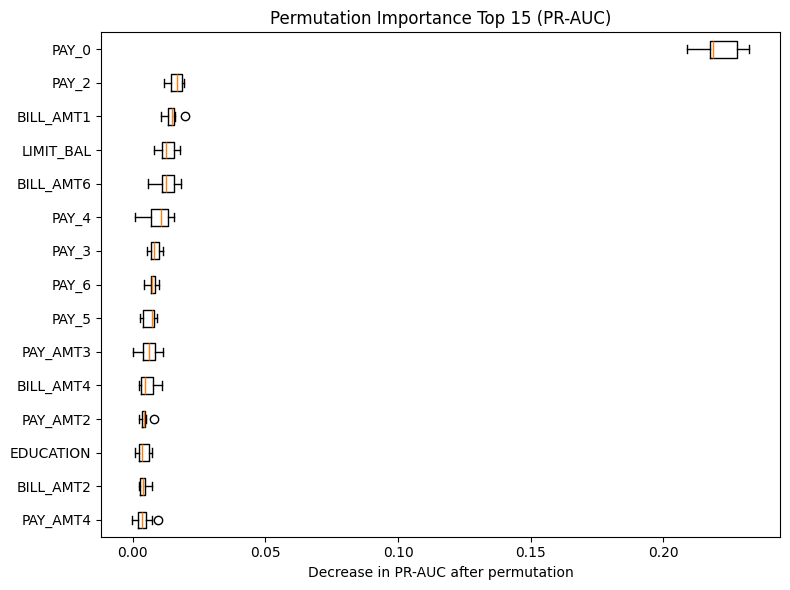

In [73]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(top_gbm, X_test, y_test, scoring='average_precision', n_repeats=10, n_jobs=-1, random_state = 48)

sorted_idx = pi.importances_mean.argsort()

top_k = 15
idx = sorted_idx[-top_k:]
plt.figure(figsize = (8,6))
plt.boxplot(pi.importances[idx].T, vert=False, tick_labels=X_test.columns[idx])
plt.title('Permutation Importance Top 15 (PR-AUC)')
plt.xlabel('Decrease in PR-AUC after permutation')
plt.tight_layout()
plt.show()

PAY_0 (repayment status in September, the most recent month before "defaulting next month") clearly is a strong feature for predicting default. It's drop in PR-AUC upon shuffling is > 0.2, indicating the model relies heavily on recent repayment status.

Others with mentionable, but smaller drops: PAY_2 (repayment status in August), BILL_AMT1 (bill statment amount September), LIMIT_BAL (amount of credit given/credit limit), BILL_AMT6 (bill statement amount April). The other remaining features show near-zero PR-AUC decrease when permuted, suggesting they add limited predictive value beyond PAY_0 and other top features.

Last hoorah! See if more aggressive approach for class imbalance will improve PR-AUC using my same param grid

In [80]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 48)

pipe_smote_gbm = Pipeline([
    ('smote', SMOTE(random_state=48)),
    ('gbm', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_jobs=-1,
        random_state=48,
    ))
])

param_grid = {
    'gbm__n_estimators': [200, 500, 800, 1000],
    'gbm__learning_rate': [0.005, 0.01, 0.05, 0.1]
}

gs_smote_gbm = GridSearchCV(pipe_smote_gbm, param_grid, cv=cv, scoring='average_precision')
gs_smote_gbm.fit(X_train, y_train)

print(gs_smote_gbm.best_score_)
print(gs_smote_gbm.best_params_)

0.5156219247325134
{'gbm__learning_rate': 0.01, 'gbm__n_estimators': 200}


On this dataset, scale_pos_weight (CV PR-AUC: 0.5561) outperformed SMOTE (CV PR-AUC 0.5156). Interestingly, fewer trees were selected with SMOTE (200 vs. 500), consistent with earlier overfitting when training on synthetic minority samples.